In [5]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/2d_pdes.jl");
include("/home/jm2386/Active_Lattice/src/2d_sims.jl");
include("/home/jm2386/Active_Lattice/src/2d_plot.jl");

v1.0
v1.1


v2.1


In [2]:
Params = []
DT, DR, N, Nθ, Δx, Lx, Ly, δt, δ, ϕa, ϕp = (1.0, 1.0, 32, 20, 0.04, 2.0, 2.0, 1e-5, 0.1, 0.45, 0.0);
T, save_interval, param_name = (20.0, 0.1, "test")
map([50., 60. , 70., 80.]) do v0
    param = _2d_new_param(DT, v0, DR, N, Nθ, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true)
    push!(Params,param)
end
param = Params[1]
ts, fs = load_compress_pde(param)
t,f = ts[end], fs[end]

full load


saved


(3.7000020770314785, [0.012902521287341324 0.016453056089603835 … 0.0033385633127279626 0.007386198051788175; 0.013635676436097836 0.01581281102579668 … 0.005847783935631969 0.010350730331555355; … ; 0.0070503659098143205 0.01473101406638718 … 0.003256587580499266 0.0038742492080376667; 0.01028356181272534 0.016384073415716637 … 0.0028866866530007753 0.004543757799783355;;; 0.0010592888704863798 0.0016776671885992633 … 0.0005431253940433027 0.0006827244370839824; 0.0011939870914442518 0.0018012510314563185 … 0.0005498469958596147 0.0007878919018445166; … ; 0.0009685717485087911 0.0014628755609685825 … 0.000986221856451585 0.0009301644939093261; 0.0009563038404072038 0.0015544604119126374 … 0.000714908919691766 0.0006763001009486842;;; 0.00011143083383035808 0.00018157294955794284 … 0.00012191408959664968 8.882602281493777e-5; 0.00011789461104721248 0.00019041202974214803 … 8.635662612497127e-5 8.415337057494784e-5; … ; 0.00018017025224822278 0.0002071201741205232 … 0.000324492389706182

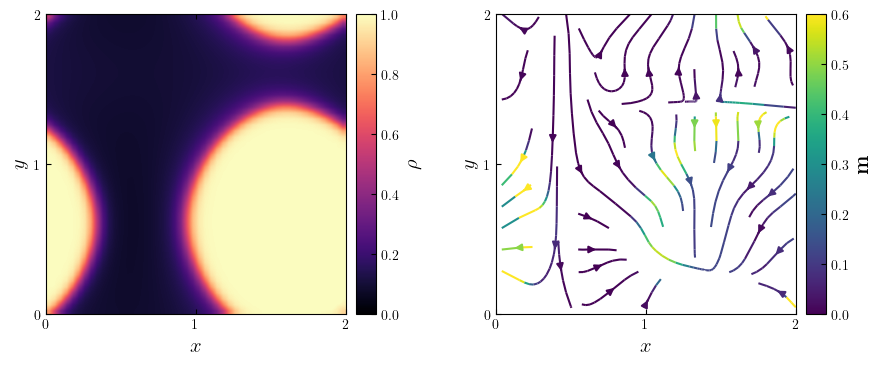

In [17]:
#t,f = ts[20], fs[20]
# create fig
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,5))
# add image
    ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
    plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.0, cmax = 1.0, cbar = true)
    ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
    cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
    plot_pde_mag(ax, cbar_ax, param, f; cmin = 0.0, cmax = 0.6, cbar = true, density = 0.5)
#
display(fig)

In [7]:
using PyCall
@pyimport matplotlib.animation as anim
rc("text", usetex=true)
fig = plt.figure(figsize=(10,5))
rc("text", usetex=true)
@unpack save_interval = param
scale_factor = 1
interval  = save_interval*scale_factor*1000
frames    = Int64( length(ts)/scale_factor ÷ 1)
function makeframe(i)
        clf()
        t, f = ts[i+1], fs[i+1]
        # add image
                ax      = fig.add_axes([0.1, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.41, 0.1, 0.02, 0.6])
                plot_pde_rho(ax, cbar_ax, param, f; cmin = 0.0, cmax = 1.0, cbar = true)
                ax      = fig.add_axes([0.55, 0.1, 0.3, 0.6])
                cbar_ax = fig.add_axes([0.86, 0.1, 0.02, 0.6])
                plot_pde_mag(ax, cbar_ax, param, f; cmin = -0.0, cmax = 0.6, cbar = true, density = 0.5)
        #
        return fig
end
myanim = anim.FuncAnimation(fig, makeframe, frames=frames, interval=interval)
# Convert it to an MP4 movie file and saved on disk in this format.
        filename, pathname = pde_vid_save_name(param,ts[end])
        mkpath(pathname)
        myanim[:save](filename, bitrate=-1, dpi= 100, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])